# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv8')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 999)
sinasc_raw.dtypes


ORIGEM            int64
CODESTAB        float64
CODMUNNASC        int64
LOCNASC           int64
IDADEMAE          int64
ESTCIVMAE       float64
ESCMAE           object
CODOCUPMAE      float64
QTDFILVIVO      float64
QTDFILMORT      float64
CODMUNRES         int64
GESTACAO         object
GRAVIDEZ         object
PARTO            object
CONSULTAS         int64
DTNASC           object
HORANASC        float64
SEXO             object
APGAR1          float64
APGAR5          float64
RACACOR          object
PESO              int64
IDANOMAL        float64
DTCADASTRO       object
CODANOMAL        object
NUMEROLOTE        int64
VERSAOSIST       object
DTRECEBIM        object
DIFDATA           int64
DTRECORIGA      float64
NATURALMAE      float64
CODMUNNATU      float64
CODUFNATU       float64
ESCMAE2010      float64
SERIESCMAE      float64
DTNASCMAE       float64
RACACORMAE      float64
QTDGESTANT      float64
QTDPARTNOR      float64
QTDPARTCES      float64
IDADEPAI        float64
DTULTMENST      

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [33]:
munResLatCut = pd.cut(sinasc_raw['munResLat'], [sinasc_raw.munResLat.min(), -10.5, sinasc_raw.munResLat.max()])

sinasc_raw.pivot_table(values=['CONSULTAS','IDANOMAL'],
                     index=[munResLatCut],
                     aggfunc=['mean','min','max','median','std','var'])

mean                 min                max             median                std                 var          
                CONSULTAS  IDANOMAL CONSULTAS IDANOMAL CONSULTAS IDANOMAL CONSULTAS IDANOMAL CONSULTAS  IDANOMAL CONSULTAS  IDANOMAL
munResLat                                                                                                                           
(-13.5, -10.5]   3.693177  2.014746         1      1.0         9      9.0         4      2.0  0.644439  0.393126  0.415301  0.154548
(-10.5, -8.769]  3.467436  2.044911         1      1.0         9      9.0         4      2.0  0.888240  0.624175  0.788970  0.389594

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [34]:
munResAreaCut = pd.cut(sinasc_raw['munResArea'], [sinasc_raw.munResArea.min(), 3000, sinasc_raw.munResArea.max()])

sinasc_raw.pivot_table(values=['ESCMAEAGR1','TPDOCRESP'],
                     index=[munResAreaCut],
                     aggfunc=['mean','min','max','median','std','var'])

mean                  min                  max               median                  std                  var          
                    ESCMAEAGR1 TPDOCRESP ESCMAEAGR1 TPDOCRESP ESCMAEAGR1 TPDOCRESP ESCMAEAGR1 TPDOCRESP ESCMAEAGR1 TPDOCRESP ESCMAEAGR1 TPDOCRESP
munResArea                                                                                                                                       
(459.978, 3000.0]     6.812598  3.082168        0.0       0.0       12.0       5.0        6.0       3.0   2.844653  1.241113   8.092050  1.540362
(3000.0, 34096.394]   7.087538  2.971790        0.0       0.0       12.0       5.0        6.0       3.0   3.135517  1.154958   9.831465  1.333929

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [30]:
munResAltCut = pd.qcut(sinasc_raw['munResAlt'],4)

sinasc_raw.pivot_table(values=['MESPRENAT','CONSPRENAT'],
                     index=[munResAltCut],
                     aggfunc=['mean','min','max','median','std','var'])

mean                   min                  max               median                  std                   var             
               CONSPRENAT  MESPRENAT CONSPRENAT MESPRENAT CONSPRENAT MESPRENAT CONSPRENAT MESPRENAT CONSPRENAT  MESPRENAT CONSPRENAT    MESPRENAT
munResAlt                                                                                                                                        
(84.999, 87.0]   7.506039  11.402551        0.0       1.0       99.0      99.0        7.0       3.0   6.573333  27.022330  43.208703   730.206316
(87.0, 153.0]    8.116407  14.216084        0.0       1.0       99.0      99.0        8.0       2.0   4.595554  32.534356  21.119119  1058.484341
(153.0, 191.0]   8.815824   4.977896        0.0       1.0       99.0      99.0        9.0       2.0   3.905380  15.619351  15.251997   243.964139
(191.0, 595.0]   8.708373   3.624640        0.0       1.0       99.0      99.0        8.0       2.0   4.458784  10.364704  19.880755   107.427087

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [36]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    
    
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

<Axes: xlabel='mes'>

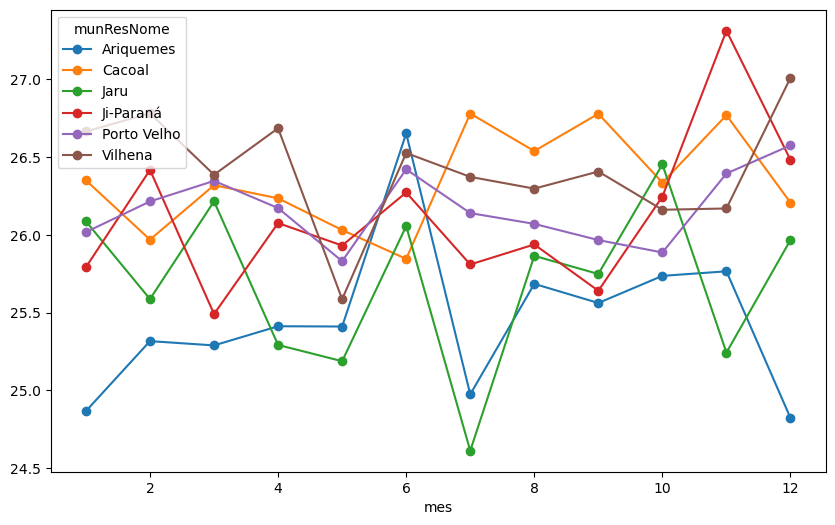

In [38]:
sinasc = sinasc_raw.set_index('munResNome')
sinasc['mes'] = pd.to_datetime(sinasc['DTNASC']).dt.month
media_idade_ano = sinasc.groupby(['mes',imediatas])['IDADEMAE'].mean().unstack()
media_idade_ano.plot(kind='line', marker='o', figsize=(10, 6))


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [48]:
IDH = {
    'Porto Velho':'IDH-M alto',
    'Vilhena':'IDH-M alto',
    'Cacoal':'IDH-M alto',
    'Ji-Paraná':'IDH-M alto',
    'Pimenta Bueno':'IDH-M alto',
    'Ariquemes':'IDH-M alto',
    'Rolim de Moura':'IDH-M alto',
    
    'Cerejeiras':'IDH-M médio',
    'Jaru':'IDH-M médio',
    'Colorado do Oeste':'IDH-M médio',
    'Ouro Preto do Oeste':'IDH-M médio',
    "Espigão d'Oeste":'IDH-M médio',
    "Santa Luzia d'Oeste":'IDH-M médio',
    'Pimenteiras do Oeste':'IDH-M médio',
    'Presidente Médici':'IDH-M médio',
    'Castanheiras':'IDH-M médio',
    'Guajará-Mirim':'IDH-M médio',
    'Chupinguaia':'IDH-M médio',
    'Cabixi':'IDH-M médio',
    'Candeias do Jamari':'IDH-M médio',
    "São Felipe d'Oeste":'IDH-M médio',
    "Cacaulândia":'IDH-M médio',
    "São Miguel do Guaporé":'IDH-M médio',
    "Mirante da Serra":'IDH-M médio',
    "Alvorada d'Oeste":'IDH-M médio',
    "Teixeirópolis":'IDH-M médio',
    "Nova Brasilândia d'Oeste":'IDH-M médio',
    "Rio Crespo":'IDH-M médio',
    "Primavera de Rondônia":'IDH-M médio',
    "Alta Floresta d'Oeste":'IDH-M médio',
    "Ministro Andreazza":'IDH-M médio',
    "Novo Horizonte do Oeste":'IDH-M médio',
    "Vale do Paraíso":'IDH-M médio',
    "Alto Paraíso":'IDH-M médio',
    "Parecis":'IDH-M médio',
    "Buritis":'IDH-M médio',
    "Itapuã do Oeste":'IDH-M médio',
    "Corumbiara":'IDH-M médio',
    "Cujubim":'IDH-M médio',
    "Costa Marques":'IDH-M médio',
    "São Francisco do Guaporé":'IDH-M médio',
    "Urupá":'IDH-M médio',
    "Monte Negro":'IDH-M médio',
    
    "Seringueiras":'IDH-M baixo',
    "Governador Jorge Teixeira":'IDH-M baixo',
    "Machadinho d'Oeste":'IDH-M baixo',
    "Campo Novo de Rondônia":'IDH-M baixo',
    "Alto Alegre dos Parecis":'IDH-M baixo',
    "Theobroma":'IDH-M baixo',
    "Nova União":'IDH-M baixo',
    "Nova Mamoré":'IDH-M baixo',
    "Vale do Anari":'IDH-M baixo',
    
}

In [61]:
sinasc = sinasc_raw.set_index('munResNome')
sinasc.pivot_table(values=['IDADEMAE','APGAR5','QTDFILVIVO','QTDFILMORT'],
                     index=[IDH],
                     aggfunc=['mean','min','max'])

mean                                     min                                   max                               
               APGAR5   IDADEMAE QTDFILMORT QTDFILVIVO APGAR5 IDADEMAE QTDFILMORT QTDFILVIVO APGAR5 IDADEMAE QTDFILMORT QTDFILVIVO
munResNome                                                                                                                        
IDH-M alto   9.171668  26.280332   0.272297   1.033960    0.0       12        0.0        0.0   10.0       47       28.0       12.0
IDH-M baixo  9.267925  25.269231   0.253521   1.056270    1.0       13        0.0        0.0   10.0       46        6.0        8.0
IDH-M médio  9.225567  25.848191   0.272386   1.093111    0.0       11        0.0        0.0   10.0       53        7.0       14.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [58]:
IFDM = {
    "Ariquemes":"Desenvolvimento moderado",
    "Vilhena":"Desenvolvimento moderado",
    "Pimenta Bueno":"Desenvolvimento moderado",
    "Porto Velho":"Desenvolvimento moderado",
    "Ji-Paraná":"Desenvolvimento moderado",
    "Cacoal":"Desenvolvimento moderado",
    "Santa Luzia d'Oeste":"Desenvolvimento moderado",
    "Rolim de Moura":"Desenvolvimento moderado",
    "Chupinguaia":"Desenvolvimento moderado",
    "São Miguel do Guaporé":"Desenvolvimento moderado",
    "Pimenteiras do Oeste":"Desenvolvimento moderado",
    "Teixeirópolis":"Desenvolvimento moderado",
    "Colorado do Oeste":"Desenvolvimento moderado",
    "Jaru":"Desenvolvimento moderado",
    "Rio Crespo":"Desenvolvimento moderado",
    "Primavera de Rondônia":"Desenvolvimento moderado",
    "Alta Floresta d'Oeste":"Desenvolvimento moderado",
    "Ouro Preto do Oeste":"Desenvolvimento moderado",
    "São Francisco do Guaporé":"Desenvolvimento moderado",
    "Candeias do Jamari":"Desenvolvimento moderado",
    "Buritis":"Desenvolvimento moderado",
    "São Felipe d'Oeste":"Desenvolvimento moderado",
    "Presidente Médici":"Desenvolvimento moderado",
    "Cerejeiras":"Desenvolvimento moderado",
    "Monte Negro":"Desenvolvimento moderado",
    "Urupá":"Desenvolvimento moderado",
    
    "Espigão d'Oeste":"Desenvolvimento regular",
    "Seringueiras":"Desenvolvimento regular",
    "Alvorada d'Oeste":"Desenvolvimento regular",
    "Itapuã do Oeste":"Desenvolvimento regular",
    "Cabixi":"Desenvolvimento regular",
    "Novo Horizonte do Oeste":"Desenvolvimento regular",
    "Nova Brasilândia d'Oeste":"Desenvolvimento regular",
    "Vale do Paraíso":"Desenvolvimento regular",
    "Corumbiara":"Desenvolvimento regular",
    "Alto Paraíso":"Desenvolvimento regular",
    "Cacaulândia":"Desenvolvimento regular",
    "Vale do Anari":"Desenvolvimento regular",
    "Ministro Andreazza":"Desenvolvimento regular",
    "Costa Marques":"Desenvolvimento regular",
    "Nova União":"Desenvolvimento regular",
    "Guajará-Mirim":"Desenvolvimento regular",
    "Mirante da Serra":"Desenvolvimento regular",
    "Parecis":"Desenvolvimento regular",
    "Castanheiras":"Desenvolvimento regular",
    "Theobroma":"Desenvolvimento regular",
    "Machadinho d'Oeste":"Desenvolvimento regular",
    "Campo Novo de Rondônia":"Desenvolvimento regular",
    "Nova Mamoré":"Desenvolvimento regular",
    "Cujubim":"Desenvolvimento regular",
    "Alto Alegre dos Parecis":"Desenvolvimento regular",
    "Governador Jorge Teixeira":"Desenvolvimento regular"
}

In [63]:
sinasc = sinasc_raw.set_index('munResNome')
sinasc.pivot_table(values=['IDADEMAE','APGAR1','QTDFILVIVO','QTDFILMORT'],
                     index=[IFDM],
                     aggfunc=['mean','min','max'])

mean                                     min                                   max                               
                            APGAR1   IDADEMAE QTDFILMORT QTDFILVIVO APGAR1 IDADEMAE QTDFILMORT QTDFILVIVO APGAR1 IDADEMAE QTDFILMORT QTDFILVIVO
munResNome                                                                                                                                     
Desenvolvimento moderado  8.166159  26.226921   0.272476   1.030350    0.0       12        0.0        0.0   10.0       53       28.0       12.0
Desenvolvimento regular   8.105263  25.412005   0.264967   1.172404    0.0       11        0.0        0.0   10.0       52        7.0       14.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [64]:
PIB = {
    "Porto Velho":"Acima de 1 Bilhão",
    "Ji-Paraná":"Acima de 1 Bilhão",
    "Vilhena":"Acima de 1 Bilhão",
    "Ariquemes":"Acima de 1 Bilhão",
    "Cacoal":"Acima de 1 Bilhão",
    "Jaru":"Acima de 1 Bilhão",
    "Rolim de Moura":"Acima de 1 Bilhão",
    "Pimenta Bueno":"Acima de 1 Bilhão",
    
    "Guajará-Mirim":"Acima de 500 Milhões",
    "Ouro Preto do Oeste":"Acima de 500 Milhões",
    "Buritis":"Acima de 500 Milhões",
    "Machadinho do Oeste":"Acima de 500 Milhões",
    "Espigão d'Oeste":"Acima de 500 Milhões",
    "São Miguel do Guaporé":"Acima de 500 Milhões",
    "Candeias do Jamari":"Acima de 500 Milhões",
    "Nova Mamoré":"Acima de 500 Milhões",
    "Cerejeiras":"Acima de 500 Milhões",
    
    "Alta Floresta do Oeste":"Acima de 300 Milhões",
    "Presidente Médici":"Acima de 300 Milhões",
    "Cujubim":"Acima de 300 Milhões",
    "Nova Brasilândia do Oeste":"Acima de 300 Milhões",
    "Alto Paraíso":"Acima de 300 Milhões",
    "São Francisco do Guaporé":"Acima de 300 Milhões",
    "Colorado do Oeste":"Acima de 300 Milhões",
    
    "Monte Negro":"Acima de 200 Milhões",
    "Alto Alegre dos Parecis":"Acima de 200 Milhões",
    "Campo Novo de Rondônia":"Acima de 200 Milhões",
    "Alvorada do Oeste":"Acima de 200 Milhões",
    
    "Chupinguaia":"Acima de 100 Milhões",
    "Corumbiara":"Acima de 100 Milhões",
    "Ministro Andreazza":"Acima de 100 Milhões",
    "Urupá":"Acima de 100 Milhões",
    "Costa Marques":"Acima de 100 Milhões",
    "Seringueiras":"Acima de 100 Milhões",
    "Mirante da Serra":"Acima de 100 Milhões",
    "Governador Jorge Teixeira":"Acima de 100 Milhões",
    "Theobroma":"Acima de 100 Milhões",
    "Santa Luzia do Oeste":"Acima de 100 Milhões",
    "Novo Horizonte do Oeste":"Acima de 100 Milhões",
    "Itapuã do Oeste":"Acima de 100 Milhões",
    "Vale do Paraíso":"Acima de 100 Milhões",
    "Cacaulândia":"Acima de 100 Milhões",
    "Cabixi":"Acima de 100 Milhões",
    "Vale do Anari":"Acima de 100 Milhões",
    
    "Nova União":"Até 100 Milhões",
    "Parecis":"Até 100 Milhões",
    "Rio Crespo":"Até 100 Milhões",
    "Pimenteiras do Oeste":"Até 100 Milhões",
    "Teixeirópolis":"Até 100 Milhões",
    "São Felipe do Oeste":"Até 100 Milhões",
    "Castanheiras":"Até 100 Milhões",
    "Primavera de Rondônia":"Até 100 Milhões"
}

In [66]:
sinasc = sinasc_raw.set_index('munResNome')
sinasc.pivot_table(values=['IDADEMAE','IDADEPAI','APGAR1','QTDFILVIVO','QTDFILMORT'],
                     index=[PIB],
                     aggfunc=['mean','min','max'])

mean                                                min                                            max                                        
                        APGAR1   IDADEMAE   IDADEPAI QTDFILMORT QTDFILVIVO APGAR1 IDADEMAE IDADEPAI QTDFILMORT QTDFILVIVO APGAR1 IDADEMAE IDADEPAI QTDFILMORT QTDFILVIVO
munResNome                                                                                                                                                              
Acima de 1 Bilhão     8.167346  26.265562  31.108387   0.270229   1.026435    0.0       12     15.0        0.0        0.0   10.0       47     70.0       28.0       12.0
Acima de 100 Milhões  8.054743  25.638424  31.744348   0.239824   0.992320    1.0       12     17.0        0.0        0.0   10.0       52     73.0        6.0       14.0
Acima de 200 Milhões  8.177264  25.146435  30.187500   0.263982   1.010526    0.0       13     16.0        0.0        0.0   10.0       41     55.0        4.0        7.0
Acima de 300 Milhões  7.958466  25.706070  30.819149   0.251828   1.062097    0.0       11     16.0        0.0        0.0   10.0       47     64.0        5.0        8.0
Acima de 500 Milhões  8.256603  25.785927  31.381955   0.319958   1.228385    0.0       13     17.0        0.0        0.0   10.0       53     60.0        7.0       11.0
Até 100 Milhões       7.941645  26.519894  31.626126   0.172507   1.032258    1.0       14     17.0        0.0        0.0   10.0       41     67.0        2.0        6.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Nas três categorias analisadas IDH, IFDM e PIB pode se notar que a idade média das mães se mantém entre 25 e 26 anos e que a idade média dos pais é aproximadamente 5 anos mais velha, na análise do PIB pode observar um queda na quantidade de filhos mortos nos estados de até 100 milhões